In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.ensemble import StackingClassifier

In [ ]:
print("Let's Model!")

Let's Model!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df=pd.read_csv('/content/drive/MyDrive/SI670Final/pivoted_data_with_y_new.csv')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
X=df.drop(['nbapersonid','is_all_star'],axis=1)
y=df['is_all_star']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

# Create and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report for Logistic Regression:")
print(report_lr)


Logistic Regression Accuracy: 0.9565217391304348
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       149
           1       0.86      0.50      0.63        12

    accuracy                           0.96       161
   macro avg       0.91      0.75      0.80       161
weighted avg       0.95      0.96      0.95       161



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Classification Report for Naive Bayes:")
print(report_nb)


Naive Bayes Accuracy: 0.8136645962732919
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       149
           1       0.26      0.83      0.40        12

    accuracy                           0.81       161
   macro avg       0.62      0.82      0.64       161
weighted avg       0.93      0.81      0.85       161



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest:")
print(report_rf)

Random Forest Accuracy: 0.9627329192546584
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.88      0.58      0.70        12

    accuracy                           0.96       161
   macro avg       0.92      0.79      0.84       161
weighted avg       0.96      0.96      0.96       161



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.ensemble import StackingClassifier

# Define the parameter grid for base models
param_grid_base_models = {
    'logistic__C': [0.01, 0.1, 1, 10],
    'random_forest__n_estimators': [50, 100],
    # 'svm__C': [0.1, 1, 10],
    # 'svm__gamma': [0.1, 1],
    'knn__n_neighbors': [5, 7]
}

# Define the parameter grid for the stacking model
param_grid_stacking_model = {
    'final_estimator__C': [0.01, 0.1, 1, 10]
}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('logistic', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier())
]


# Create the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Create the combined parameter grid
param_grid_combined = {**param_grid_base_models, **param_grid_stacking_model}

# Create the grid search
grid_search = GridSearchCV(stacking_model, param_grid_combined, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)


# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Best Model:", accuracy)

recall = recall_score(y_test, y_pred)
print("Recall for Best Model:", recall)

precision=precision_score(y_test, y_pred)
print("Precision for Best Model:", recall)

# Get the best hyperparameters for each model
best_base_model_params = {key[0] + '__' + param: value for key, value in grid_search.best_params_.items() if key[0] in ['logistic','random_forest','svm', 'knn']}
best_final_estimator_params = {'final_estimator__' + param: value for key, value in grid_search.best_params_.items() if key[0] == 'final_estimator'}

print("\nBest Hyperparameters for Base Models:")
print(best_base_model_params)

print("\nBest Hyperparameters for Final Estimator:")
print(best_final_estimator_params)


Accuracy for Best Model: 0.968944099378882
Recall for Best Model: 0.6666666666666666
Precision for Best Model: 0.6666666666666666

Best Hyperparameters for Base Models:
{}

Best Hyperparameters for Final Estimator:
{}


In [ ]:
grid_search.best_params_
# best_model

{'final_estimator__C': 10,
 'knn__n_neighbors': 5,
 'logistic__C': 10,
 'random_forest__n_estimators': 100}

In [ ]:
report_stack = classification_report(y_test, y_pred)
print(report_stack)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.89      0.67      0.76        12

    accuracy                           0.97       161
   macro avg       0.93      0.83      0.87       161
weighted avg       0.97      0.97      0.97       161



In [ ]:
#CUSOTMIZED MODEL
import xgboost
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('logistic', LogisticRegression(C=10, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100,random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define the stacking model with Logistic Regression as the meta-estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(C=10))

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)

report_stacking = classification_report(y_test, y_pred_stacking)


In [ ]:
print(f"Stacking Model Accuracy: {accuracy_stacking}")
print(f"Stacking Model Recall: {recall_stacking}")
print(f"Stacking Model Precision: {precision_stacking}")
print("Classification Report for Stacking Model:")
print(report_stacking)


## This one is GOOD!

Stacking Model Accuracy: 0.968944099378882
Stacking Model Recall: 0.6666666666666666
Stacking Model Precision: 0.8888888888888888
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.89      0.67      0.76        12

    accuracy                           0.97       161
   macro avg       0.93      0.83      0.87       161
weighted avg       0.97      0.97      0.97       161



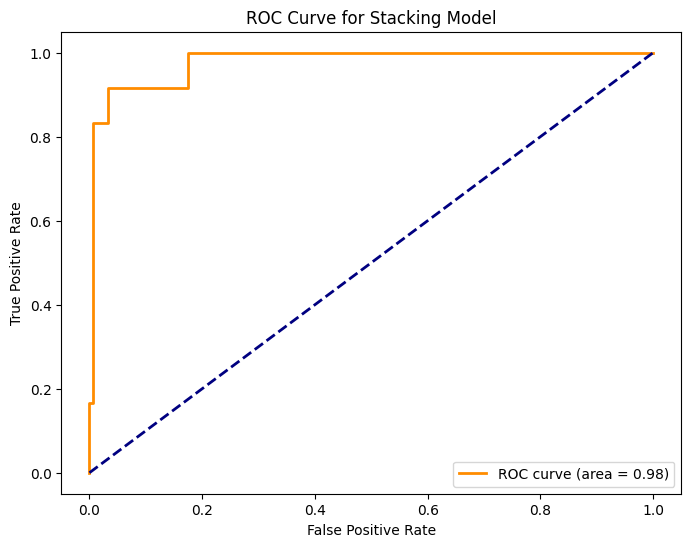

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming predictions and true labels are available
predictions = stacking_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.show()

### Predicting on 2018 data now!

In [ ]:
df_2018=pd.read_csv('/content/drive/MyDrive/SI670Final/2018_final_data.csv')

In [ ]:
X_val=df_2018.drop(['Unnamed: 0','nbapersonid','is_all_star'],axis=1)
y_val=df_2018['is_all_star']

In [ ]:
y_val.value_counts()

0    96
1     4
Name: is_all_star, dtype: int64

In [ ]:
# Make predictions on the test set
y_val_pred = stacking_model.predict(X_val)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_val, y_val_pred)
recall_stacking = recall_score(y_val, y_val_pred)
precision_stacking = precision_score(y_val, y_val_pred)

report_stacking = classification_report(y_val, y_val_pred)

In [ ]:
print(f"Stacking Model Accuracy: {accuracy_stacking}")
print(f"Stacking Model Recall: {recall_stacking}")
print(f"Stacking Model Precision: {precision_stacking}")
print("Classification Report for Stacking Model:")
print(report_stacking)

Stacking Model Accuracy: 0.99
Stacking Model Recall: 0.75
Stacking Model Precision: 1.0
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

    accuracy                           0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
indices=np.where(np.ones(y_val_pred.shape)==y_val_pred)[0]

In [ ]:
df_2018.loc[indices]['nbapersonid']

19    1628983
52    1629027
54    1629029
Name: nbapersonid, dtype: int64